In [2]:
from hossam import load_data
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
import numpy as np

## 1. 그래프 초기화

In [3]:
my_dpi = 200
font_path = "./NotoSansKR-Regular.ttf"
fm.fontManager.addfont(font_path)
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name()
my_font_name = "Noto Sans KR"
my_theme = "dark"

sb.set_theme(style=my_theme)
plt.rcParams['font.family'] = my_font_name
plt.rcParams['font.size'] = 10
plt.rcParams['axes.unicode_minus'] = False

## 2. 데이터 가져오기

In [4]:
origin = load_data("employee_data_40")
origin.head()

[data] https://data.hossam.kr/data/lab06/employee_data_40.xlsx
[desc] 어느 기업의 직원 40명을 대상으로 성별과 결혼상태, 나이, 최종학력, 월수입을 조사한 가상의 데이터(인덱스, 메타데이터 없음)
[!] Cannot read metadata


,성별,결혼상태,나이,최종학력,월수입
0,남자,기혼,21,대학교,60
1,남자,기혼,22,대학원,100
2,남자,기혼,33,대학교,200
3,여자,미혼,33,대학교,120
4,남자,미혼,28,대학교,70


Boxplot

- 연속형 데이터의 분포를 사분위수 기반으로 확인
- list, ndarray, Series 등 모든 연속형 객체를 data 파라미터에 지정한다.
- orient로 방향을 설정할 수 있다. (v:세로(기본값), h:가로)

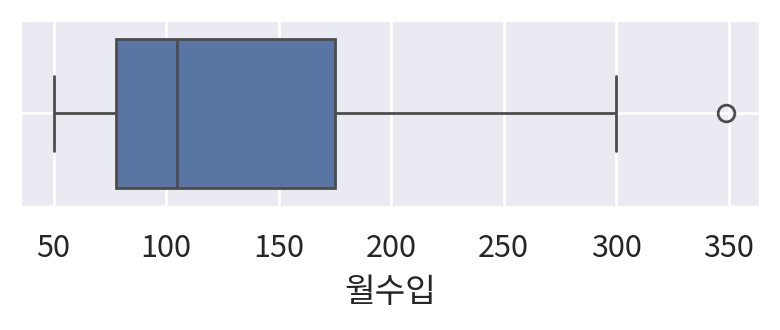

In [5]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 800             #그래프 가로 크기
height_px = 350             #그래프 세로 크기
rows = 1                    #도화지의 행 수
cols = 1                    #도화지의 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) 그래프 그리기 -> seaborn 사용
sb.boxplot(data=origin['월수입'], orient='h')

# 3) 그래프 꾸미기 -> 도화지(ax)에 직접 적용
ax.grid(True)

# 4) 출력
plt.tight_layout()                      #여백 제거
# plt.savefig("myplot.png", dpi=my_dpi)   #생략 가능
plt.show()                              #그래프 화면 출력
plt.close()                             #그래프 작업 종료

데이터프레임을 통한 상자그림

- data 파라미터에 데이터 프레임을 설정하고 y 파라미터에 표시하고자 하는 변수 이름을 문자열로 설정한다.
- x파라미터에 설정할 경우 가로 상자그림으로 표시된다.

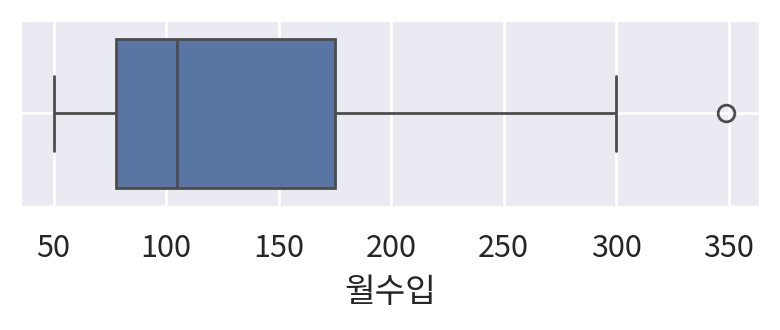

In [6]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 800             #그래프 가로 크기
height_px = 350             #그래프 세로 크기
rows = 1                    #도화지의 행 수
cols = 1                    #도화지의 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) 그래프 그리기 -> seaborn 사용
sb.boxplot(data=origin, x='월수입')

# 3) 그래프 꾸미기 -> 도화지(ax)에 직접 적용
ax.grid(True)

# 4) 출력
plt.tight_layout()                      #여백 제거
# plt.savefig("myplot.png", dpi=my_dpi)   #생략 가능
plt.show()                              #그래프 화면 출력
plt.close()                             #그래프 작업 종료

복수 변수에 대한 처리
- 표시하고자 하는 변수를 필터링하여 data 파라미터에 설정한다.

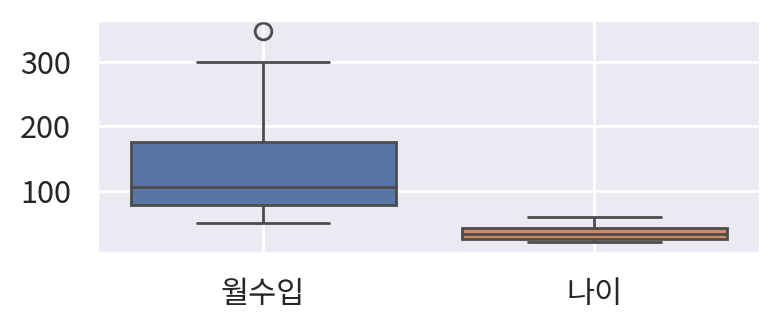

In [7]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 800             #그래프 가로 크기
height_px = 350             #그래프 세로 크기
rows = 1                    #도화지의 행 수
cols = 1                    #도화지의 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) 그래프 그리기 -> seaborn 사용
sb.boxplot(data=origin[['월수입','나이']])

# 3) 그래프 꾸미기 -> 도화지(ax)에 직접 적용
ax.grid(True)

# 4) 출력
plt.tight_layout()                      #여백 제거
# plt.savefig("myplot.png", dpi=my_dpi)   #생략 가능
plt.show()                              #그래프 화면 출력
plt.close()                             #그래프 작업 종료

## KDE(커널 밀도 추정)Plot
- 연속형 데이터의 분포를 부드러운 곡선 형태로 추정하는 비모수적 방법.
- 데이터의 전체적인 분포 모양, 봉우리(peak), 꼬리(tail) 등을 확인하는 데 유용함.

#### 비모수적 방법이란?
- "데이터가 정규분포일 것이다" 같은 가정이 없음
- 대신 데이터 자체를 기반으로 분포의 모양을 추정함
- 필요한 것은 파라미터(평균,분산 등)보다 데이터의 구조와 패턴

1. 연속성 데이터 설정

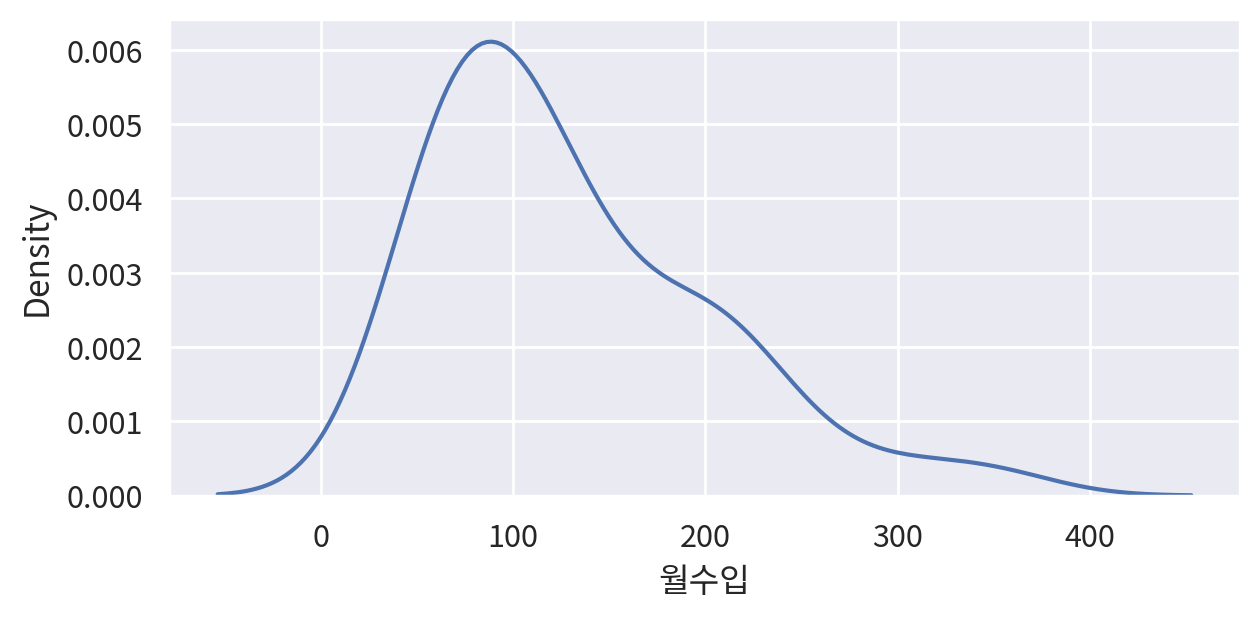

In [9]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280             #그래프 가로 크기
height_px = 640             #그래프 세로 크기
rows = 1                    #도화지의 행 수
cols = 1                    #도화지의 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) 그래프 그리기 -> seaborn 사용
sb.kdeplot(data=origin['월수입'])

# 3) 그래프 꾸미기 -> 도화지(ax)에 직접 적용
ax.grid(True)

# 4) 출력
plt.tight_layout()                      #여백 제거
# plt.savefig("myplot.png", dpi=my_dpi)   #생략 가능
plt.show()                              #그래프 화면 출력
plt.close()                             #그래프 작업 종료

2. 데이터 프레임 자체를 적용하기

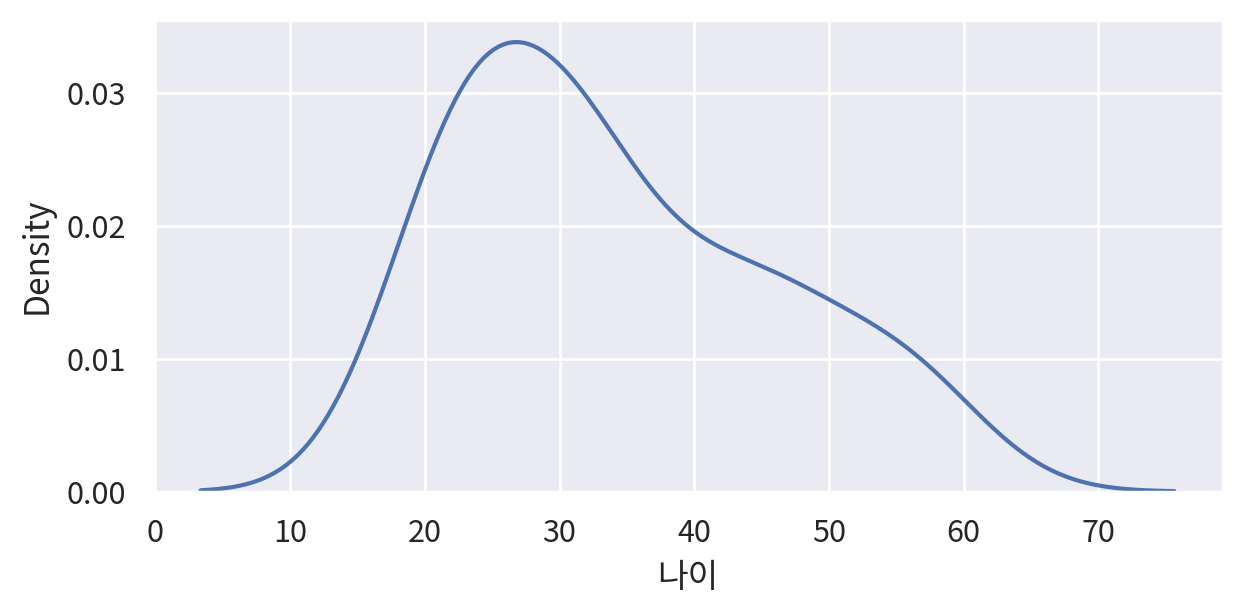

In [10]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280             #그래프 가로 크기
height_px = 640             #그래프 세로 크기
rows = 1                    #도화지의 행 수
cols = 1                    #도화지의 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) 그래프 그리기 -> seaborn 사용
sb.kdeplot(data=origin, x='나이')

# 3) 그래프 꾸미기 -> 도화지(ax)에 직접 적용
ax.grid(True)

# 4) 출력
plt.tight_layout()                      #여백 제거
# plt.savefig("myplot.png", dpi=my_dpi)   #생략 가능
plt.show()                              #그래프 화면 출력
plt.close()                             #그래프 작업 종료

3. 다중 분포
- 데이터프레임을 data 파라미터에 적용하면서 x나 y파라미터를 지정하지 않으면 모든 연속형 변수에 대한 커널 밀도 곡선이 표현된다.

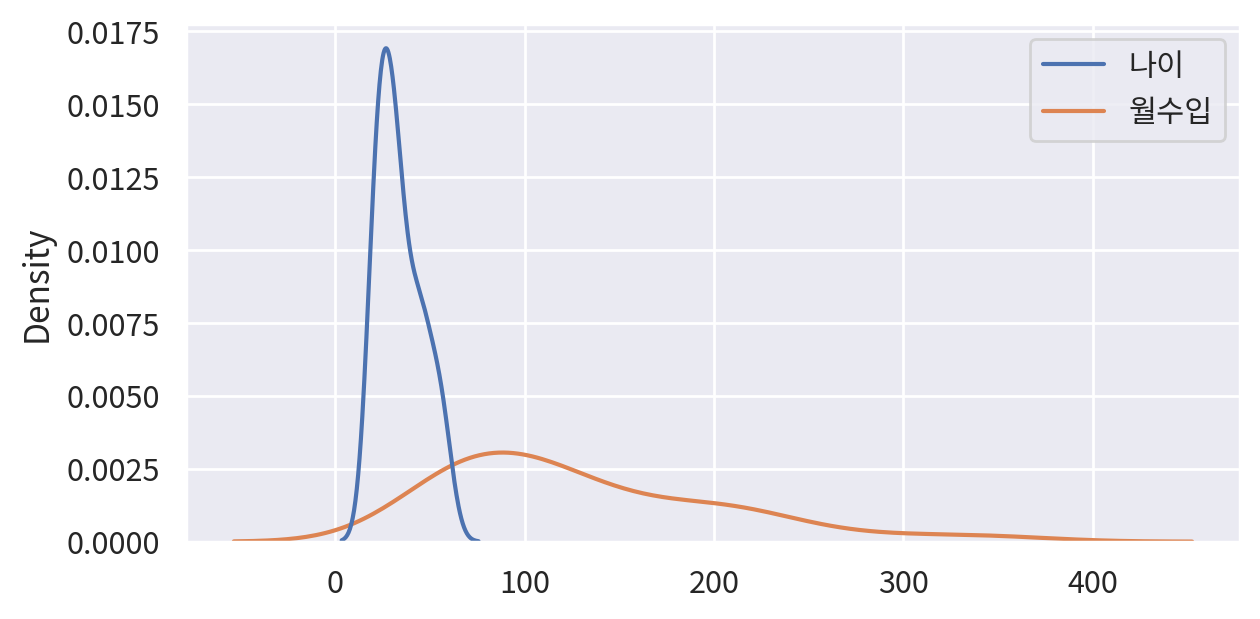

In [11]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280             #그래프 가로 크기
height_px = 640             #그래프 세로 크기
rows = 1                    #도화지의 행 수
cols = 1                    #도화지의 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) 그래프 그리기 -> seaborn 사용
sb.kdeplot(data=origin)

# 3) 그래프 꾸미기 -> 도화지(ax)에 직접 적용
ax.grid(True)

# 4) 출력
plt.tight_layout()                      #여백 제거
# plt.savefig("myplot.png", dpi=my_dpi)   #생략 가능
plt.show()                              #그래프 화면 출력
plt.close()                             #그래프 작업 종료

4. 색상 채우기
- fill=True 파라미터를 설정하면 곡선 내부에 색상이 표시된다.
- 이 때, alpha 파라미터를 0~1 사이의 값으로 설정하여 면의 투명도를 조절할 수 있다.
- 0 = 투명, 1 = 불투명

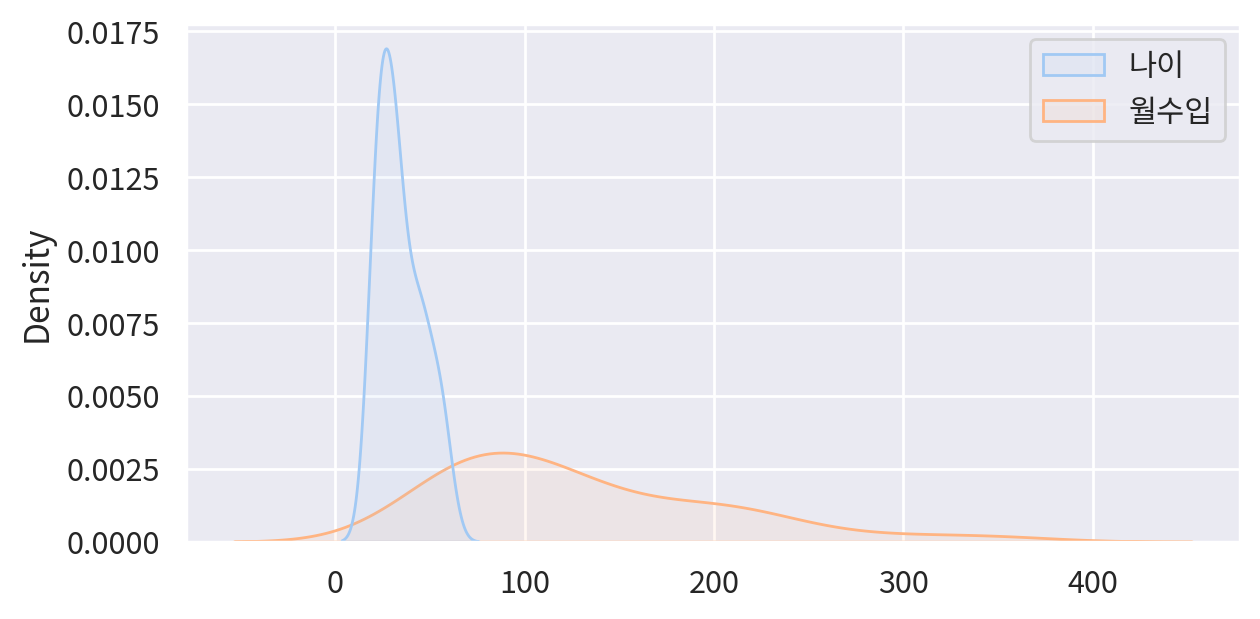

In [12]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280             #그래프 가로 크기
height_px = 640             #그래프 세로 크기
rows = 1                    #도화지의 행 수
cols = 1                    #도화지의 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) 그래프 그리기 -> seaborn 사용
sb.kdeplot(data=origin, fill=True, alpha=0.1, palette="pastel")

# 3) 그래프 꾸미기 -> 도화지(ax)에 직접 적용
ax.grid(True)

# 4) 출력
plt.tight_layout()                      #여백 제거
# plt.savefig("myplot.png", dpi=my_dpi)   #생략 가능
plt.show()                              #그래프 화면 출력
plt.close()                             #그래프 작업 종료

5. 범주에 따른 구분
- hue 파라미터에 명목형 변수의 이름을 지정하면 범주에 따라 그래프를 분기한다.

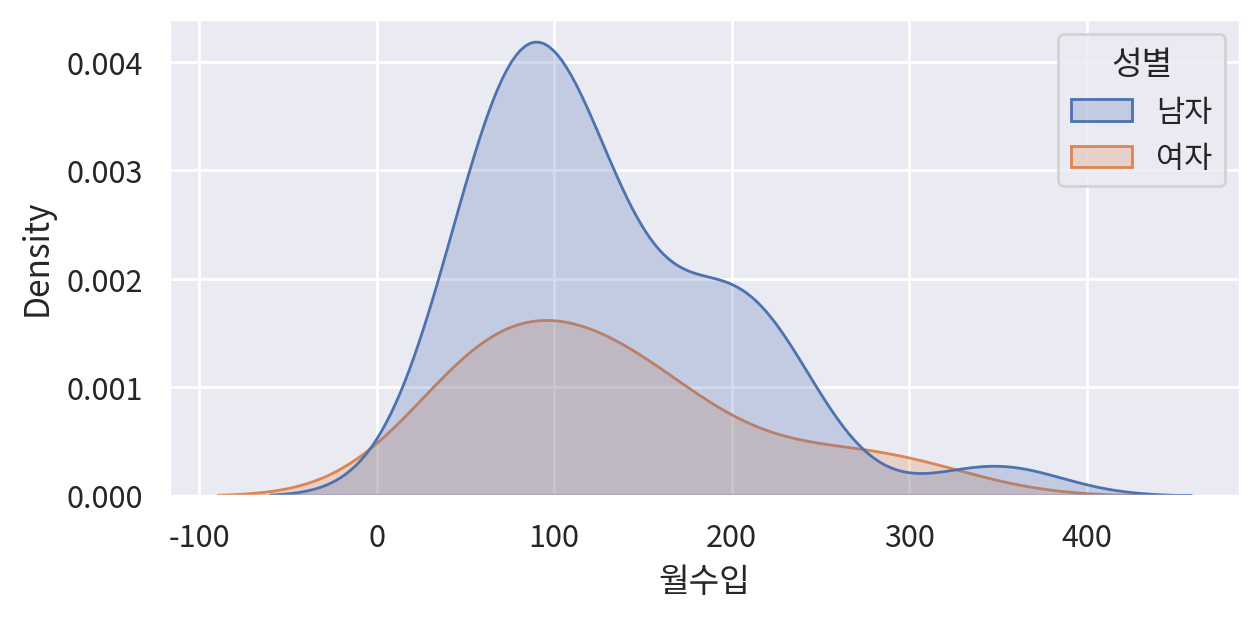

In [13]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280             #그래프 가로 크기
height_px = 640             #그래프 세로 크기
rows = 1                    #도화지의 행 수
cols = 1                    #도화지의 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) 그래프 그리기 -> seaborn 사용
sb.kdeplot(data=origin, x='월수입', hue='성별', fill=True)

# 3) 그래프 꾸미기 -> 도화지(ax)에 직접 적용
ax.grid(True)

# 4) 출력
plt.tight_layout()                      #여백 제거
# plt.savefig("myplot.png", dpi=my_dpi)   #생략 가능
plt.show()                              #그래프 화면 출력
plt.close()                             #그래프 작업 종료

#### 04. Histogram
- 도수 분포표를 시각화 한 그래프

1. 구간 수 지정하기

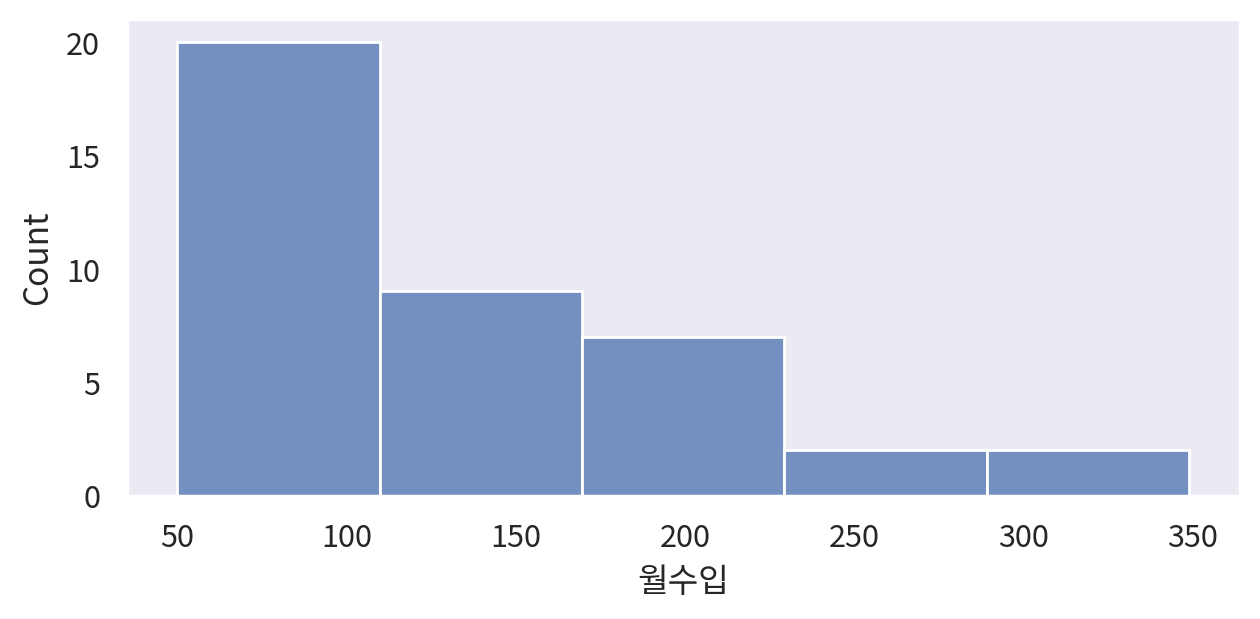

In [20]:
width_px = 1280             #그래프 가로 크기
height_px = 640             #그래프 세로 크기
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(1,1,figsize = figsize, dpi = my_dpi)

sb.histplot(data=origin['월수입'], bins=5)


plt.tight_layout()                      
plt.show()                              
plt.close()                             

2. 구간을 표시하기

In [15]:
hist, bins = np.histogram(origin['월수입'], bins=5)
print(hist)
print(bins)

[20  9  7  2  2]
[ 50.  109.8 169.6 229.4 289.2 349. ]


In [16]:
bins = bins.round().astype("int")
bins

array([ 50, 110, 170, 229, 289, 349])

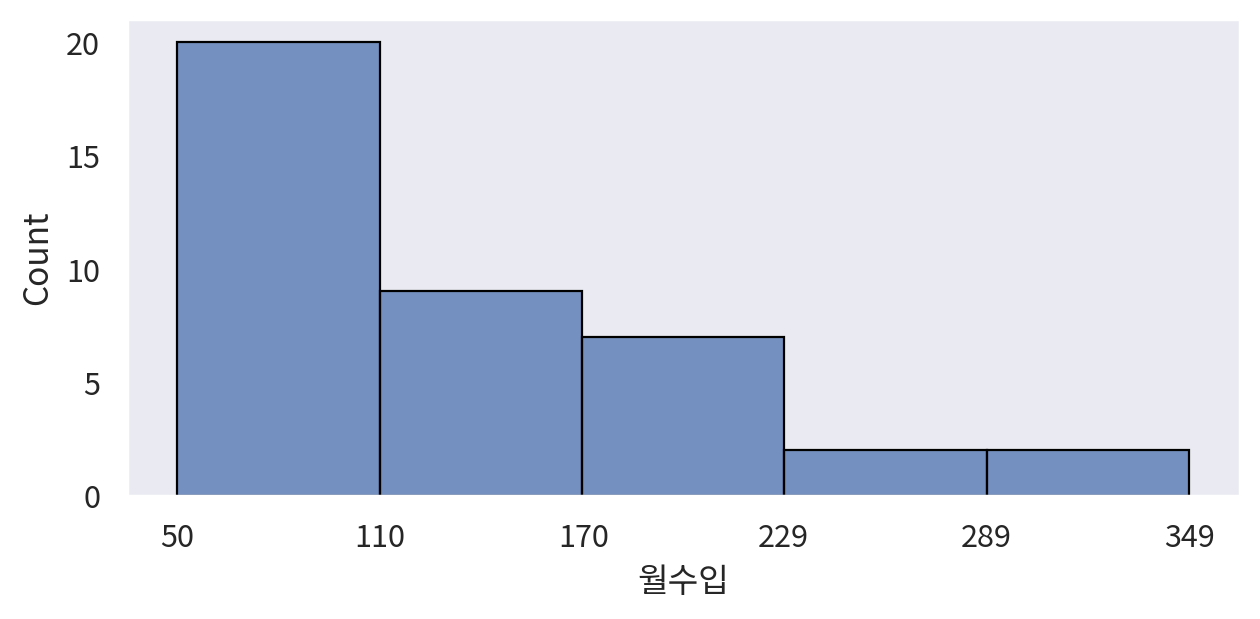

In [24]:
width_px = 1280             #그래프 가로 크기
height_px = 640             #그래프 세로 크기
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(1,1,figsize = figsize, dpi = my_dpi)

sb.histplot(data=origin['월수입'], bins=5, edgecolor='black', linewidth=0.8)
ax.set_xticks(bins,bins)

plt.tight_layout()                      
plt.show()                              
plt.close()                             

3. 구간을 직접 지정하기

- bins파라미터에 구간을 의미하는 리스트를 지정한다.

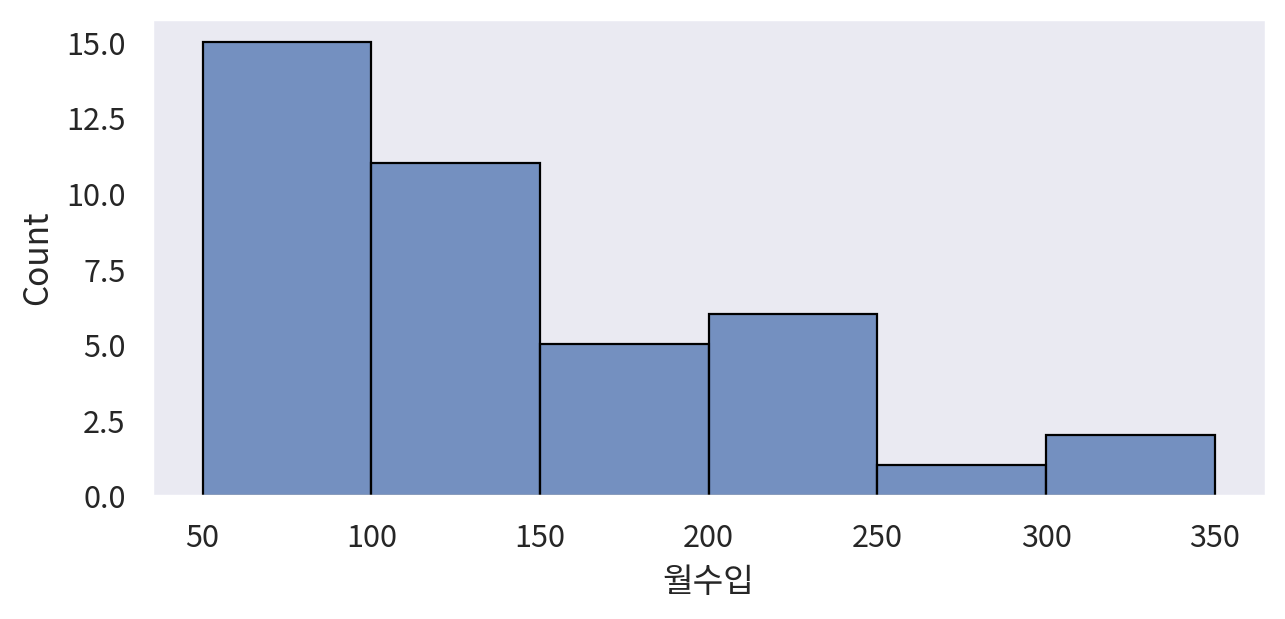

In [25]:
width_px = 1280             #그래프 가로 크기
height_px = 640             #그래프 세로 크기
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(1,1,figsize = figsize, dpi = my_dpi)

sb.histplot(data=origin['월수입'], bins=[50,100,150,200,250,300,350], edgecolor='#000000', linewidth=0.8)

plt.tight_layout()                      
plt.show()                              
plt.close()                             

4. 범주에 따른 구분

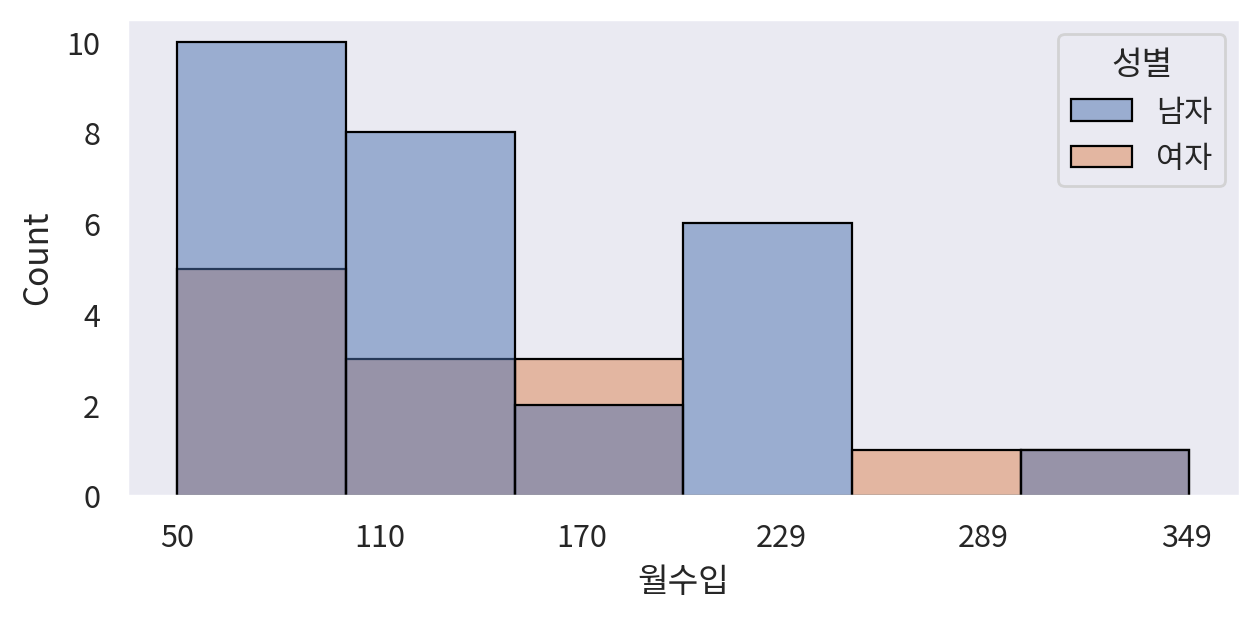

In [26]:
width_px = 1280             #그래프 가로 크기
height_px = 640             #그래프 세로 크기
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(1,1,figsize = figsize, dpi = my_dpi)

sb.histplot(data=origin, x='월수입', hue='성별',
            bins = [50,100,150,200,250,300,350], 
            edgecolor="#000000", linewidth=0.8)
ax.set_xticks(bins,bins)

plt.tight_layout()                      
plt.show()                              
plt.close()                             

5. 히스토그램의 계급의 수와 간격의 크기
- 우리에게 주어지는 데이터는 종류도 다양하며 관측치의 개수도 다양함
- 또한 그 데이터의 최솟값과 최댓값이 다양하여 계급의 개수와 계급의 간격을 설정하는 것이 어려움
1. 계급의 수를 구하는 방법

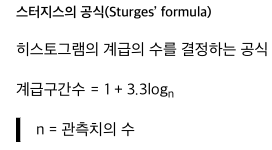
- 관측치의 수에 따른 계급구간 수 표 활용 - 통계학에서 일반적으로 활용하는 표

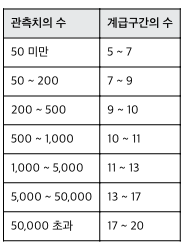

- 간격의 크기를 구하는 방법

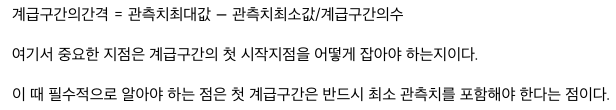

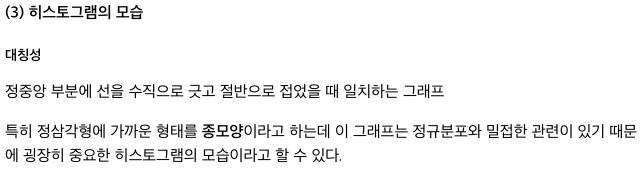

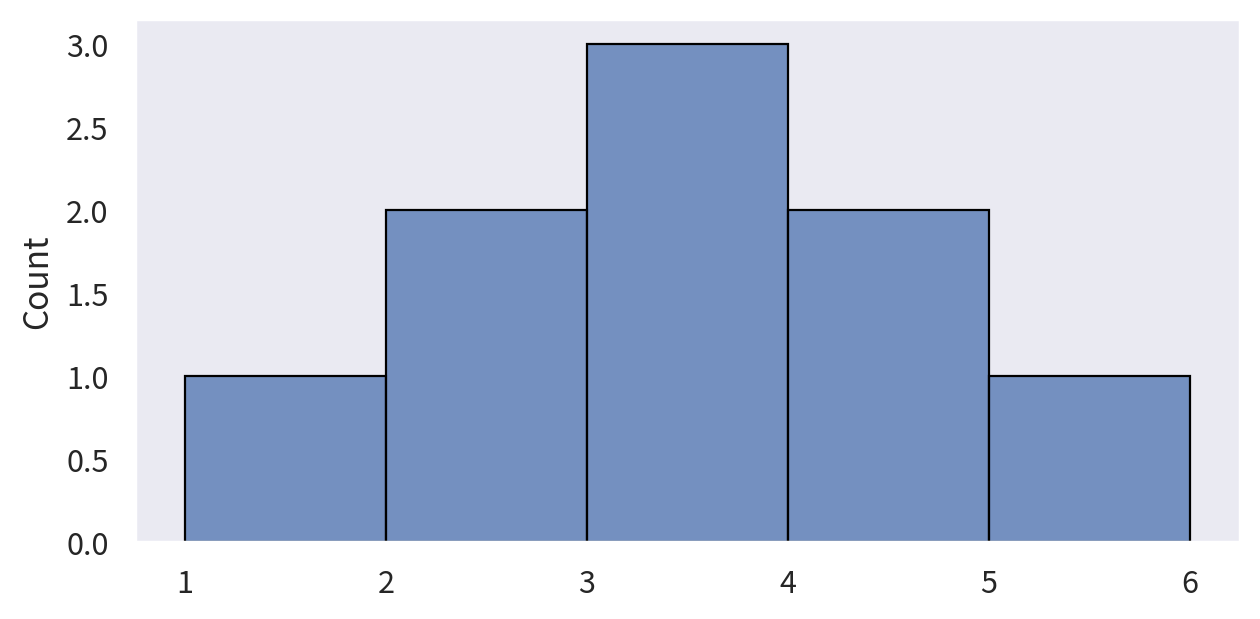

In [30]:
mybins=[1,2,3,4,5,6]
data=[1,2,2,3,3,3,4,4,5]

width_px = 1280             #그래프 가로 크기
height_px = 640             #그래프 세로 크기
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(1,1,figsize = figsize, dpi = my_dpi)

sb.histplot(data=data,
            bins = mybins, 
            edgecolor="#000000", linewidth=0.8)

plt.tight_layout()                      
plt.show()                              
plt.close()                             

- 비대칭성
    - 그래프의 모양이 점점 작아진다 -> 방향을 확인해야함
    - 양의 방향 = 양의 비대칭 (오른쪽으로 꼬리가 생긴것 = 평균이 중앙값보다 작다.(왼쪽에 몰려있다는 말))
    - 음의 방향 = 음의 비대칭 (왼쪽으로 꼬리가 생긴것 = 평균이 중앙값보다 크다.(오른쪽에 몰려있다는 말))


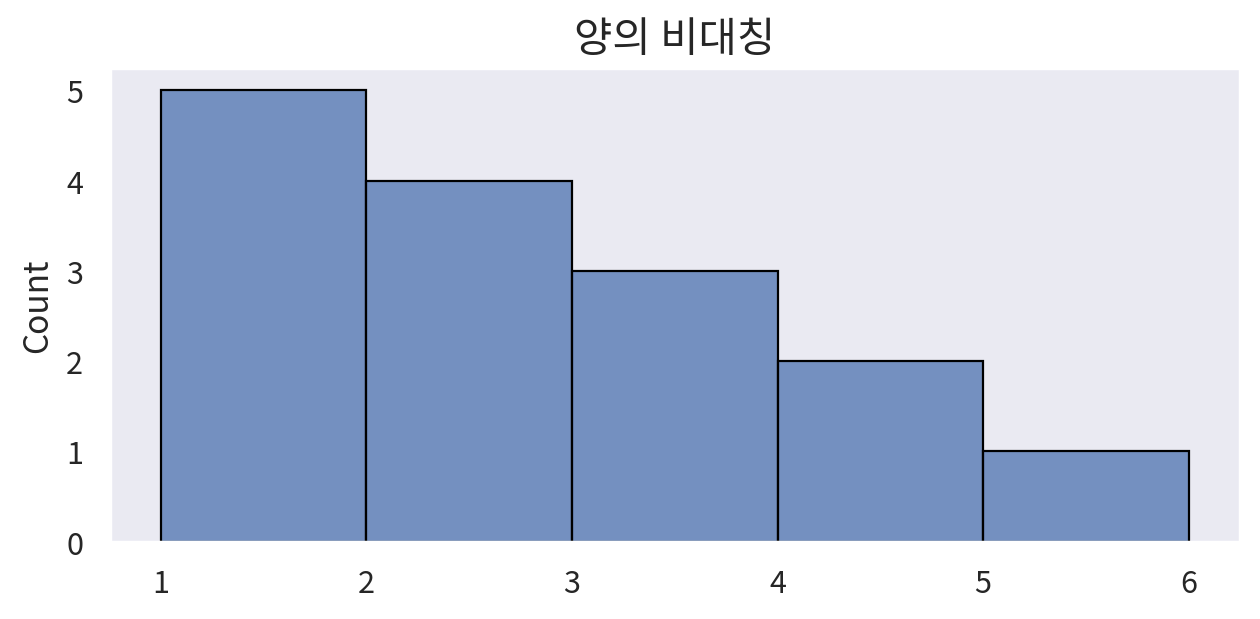

In [34]:
mybins=[1,2,3,4,5,6]
data=[1,1,1,1,1,2,2,2,2,3,3,3,4,4,5]

width_px = 1280             #그래프 가로 크기
height_px = 640             #그래프 세로 크기
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(1,1,figsize = figsize, dpi = my_dpi)

sb.histplot(data=data,
            bins = mybins, 
            edgecolor="#000000", linewidth=0.8)
ax.set_title("양의 비대칭", fontsize=15)
plt.tight_layout()                      
plt.show()                              
plt.close()                             

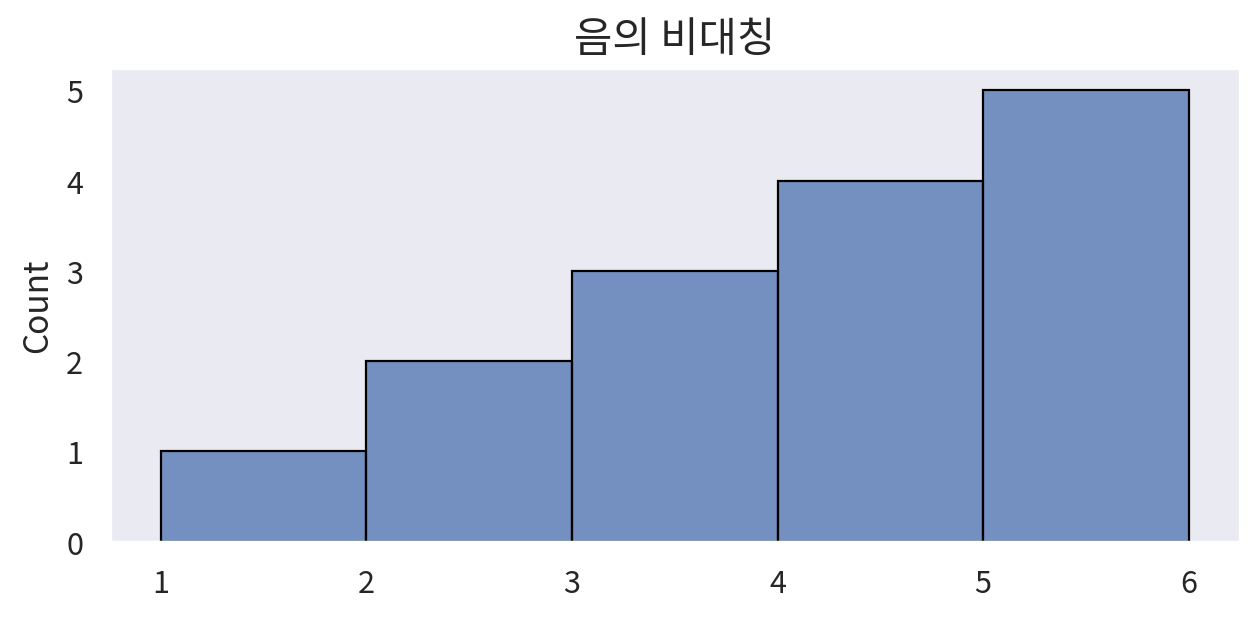

In [35]:
mybins=[1,2,3,4,5,6]
data=[1,2,2,3,3,3,4,4,4,4,5,5,5,5,5]

width_px = 1280             #그래프 가로 크기
height_px = 640             #그래프 세로 크기
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(1,1,figsize = figsize, dpi = my_dpi)

sb.histplot(data=data,
            bins = mybins, 
            edgecolor="#000000", linewidth=0.8)
ax.set_title("음의 비대칭", fontsize=15)
plt.tight_layout()                      
plt.show()                              
plt.close()                             

봉우리 계급 구간의 수
- 히스토그램에서 가장 높은 도수를 나타내고 있는 수치를 최빈값(mode)라고 부름

최빈 계급
- 최대의 관측치 수를 가진 계급
- 만일 최빈 계급이 하나일 경우에는 단봉을 가진 히스토그램이라 함, 두 개면 양봉을 가진 히스토그램

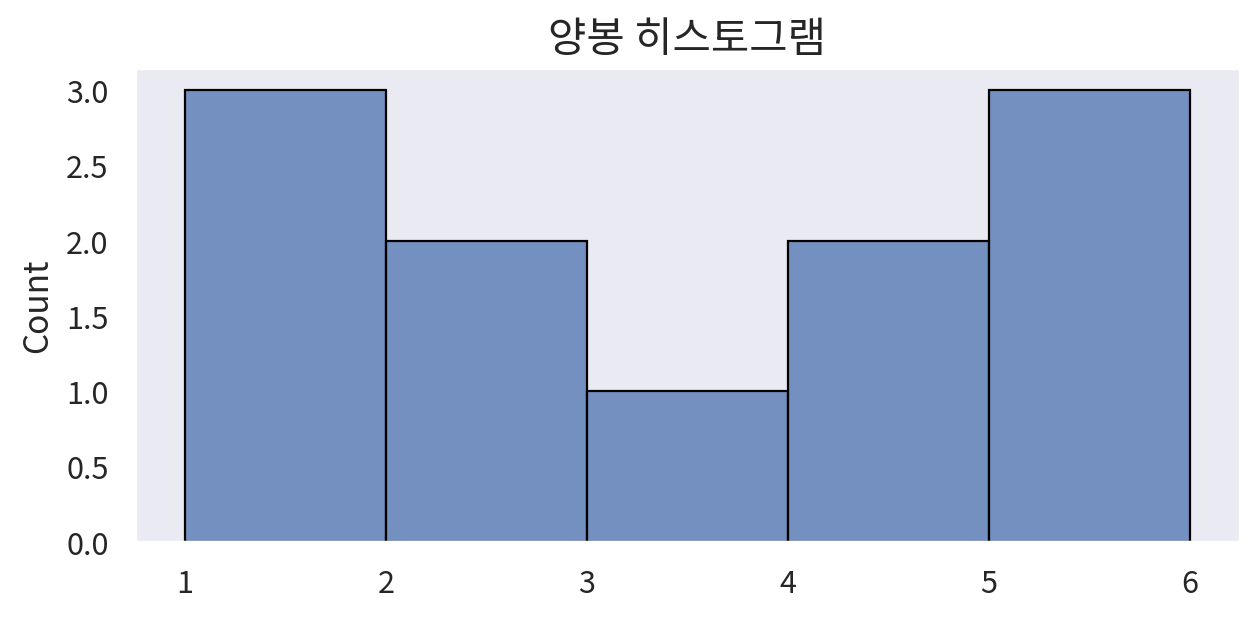

In [36]:
mybins=[1,2,3,4,5,6]
data=[1,1,1,2,2,3,4,4,5,5,5]

width_px = 1280             #그래프 가로 크기
height_px = 640             #그래프 세로 크기
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(1,1,figsize = figsize, dpi = my_dpi)

sb.histplot(data=data,
            bins = mybins, 
            edgecolor="#000000", linewidth=0.8)
ax.set_title("양봉 히스토그램", fontsize=15)
plt.tight_layout()                      
plt.show()                              
plt.close()                             